**FE - Feature Engineering**

Ingeniería de Características

[ Base de Datos TEC Services ]

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# 1. Cargar los datos
file_path = 'mi_tec_chat_data.xlsx'
df = pd.read_excel(file_path)

In [36]:
# 2. Ingeniería de Características
# Crear nueva característica: longitud de las preguntas
df['Question_Length'] = df['Question'].apply(lambda x: len(str(x)))

In [37]:
# Codificación de variables categóricas (One-Hot Encoding) sin eliminar las columnas originales
categorical_columns = ['Tema', 'Subtema']
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))


In [38]:
# Concatenar las nuevas características con el DataFrame original
df = pd.concat([df, df_encoded], axis=1)

In [39]:
# Escalamiento de variables numéricas (Estandarización)
numeric_columns = ['Question_Length']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [40]:
# Eliminar cualquier columna no numérica antes de aplicar VarianceThreshold
df_numeric = df.select_dtypes(include=[np.number])  # Filtrar solo columnas numéricas


In [41]:
# 3. Selección de Características
# Umbral de varianza: Eliminamos características con varianza menor al umbral (por ejemplo, 0.01)
selector = VarianceThreshold(threshold=0.01)
df_reduced = pd.DataFrame(selector.fit_transform(df_numeric), columns=df_numeric.columns[selector.get_support()])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [42]:
# **Manejo de valores faltantes**
df_reduced.fillna(df_reduced.mean(), inplace=True)

In [43]:
# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

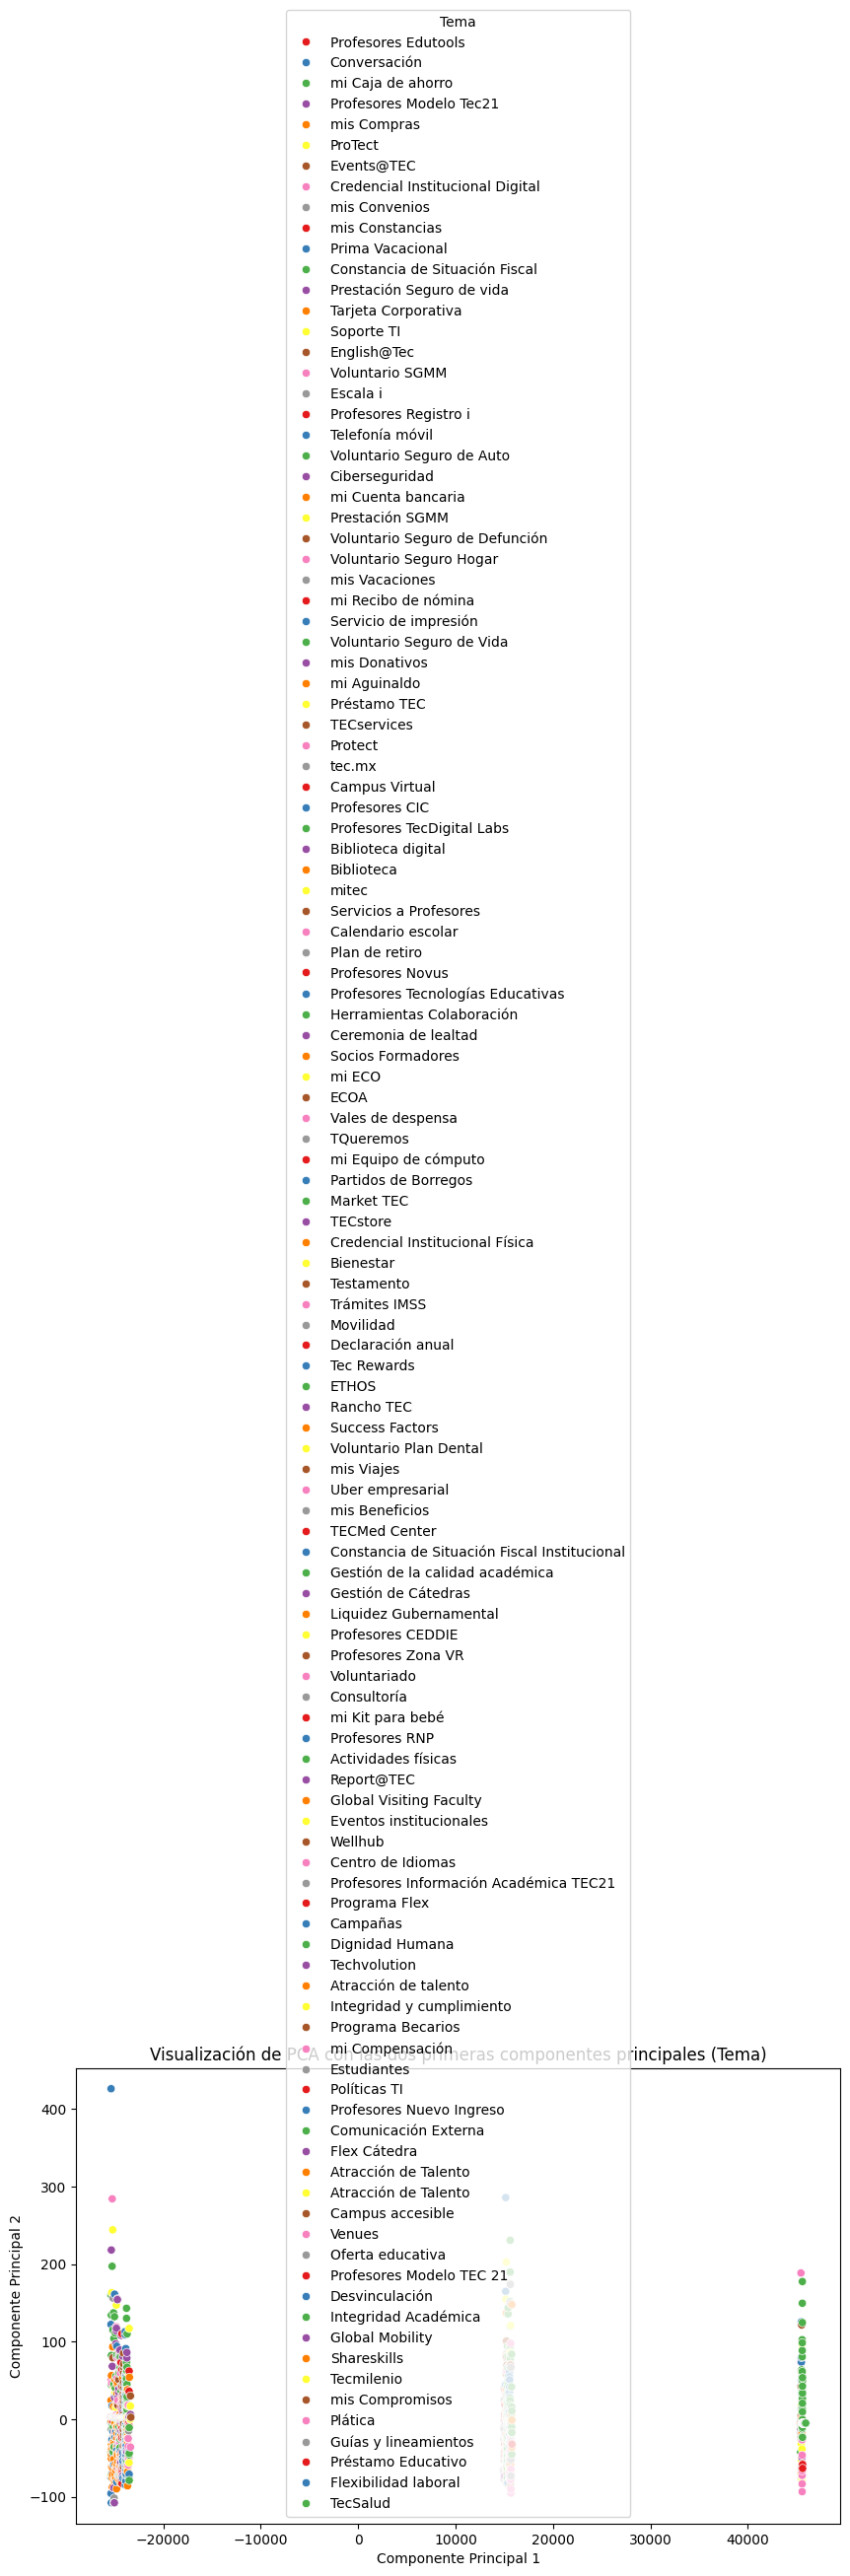

In [44]:
# 4. Visualización de PCA por 'Tema' (con la columna 'Tema' original)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Tema', palette='Set1', legend='full')
plt.title('Visualización de PCA con las dos primeras componentes principales (Tema)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tema')
plt.show()

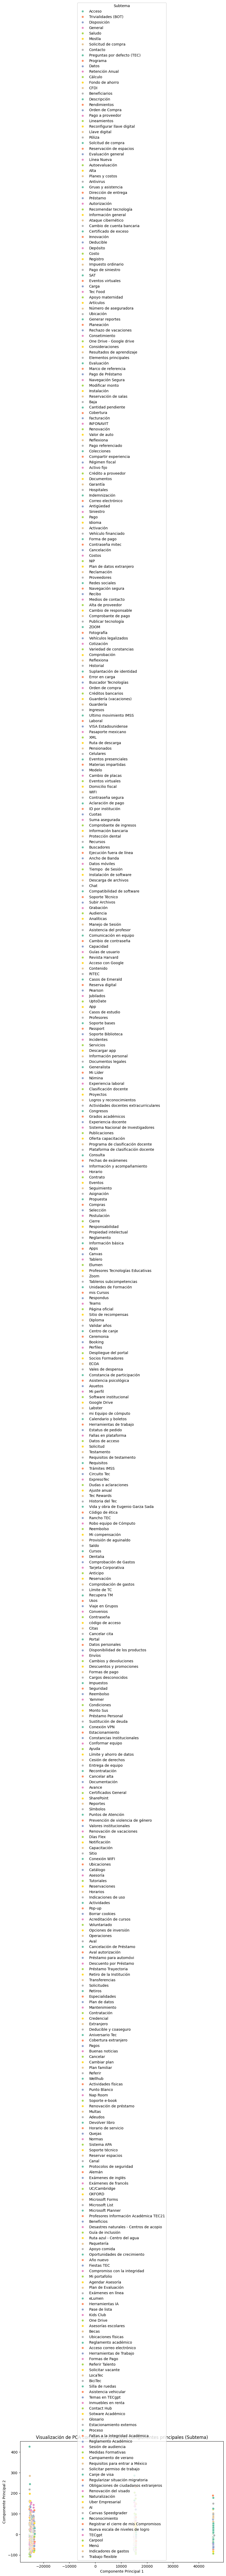

In [45]:
# 5. Visualización de PCA por 'Subtema' (con la columna 'Subtema' original)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Subtema', palette='Set2', legend='full')
plt.title('Visualización de PCA con las dos primeras componentes principales (Subtema)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Subtema')
plt.show()

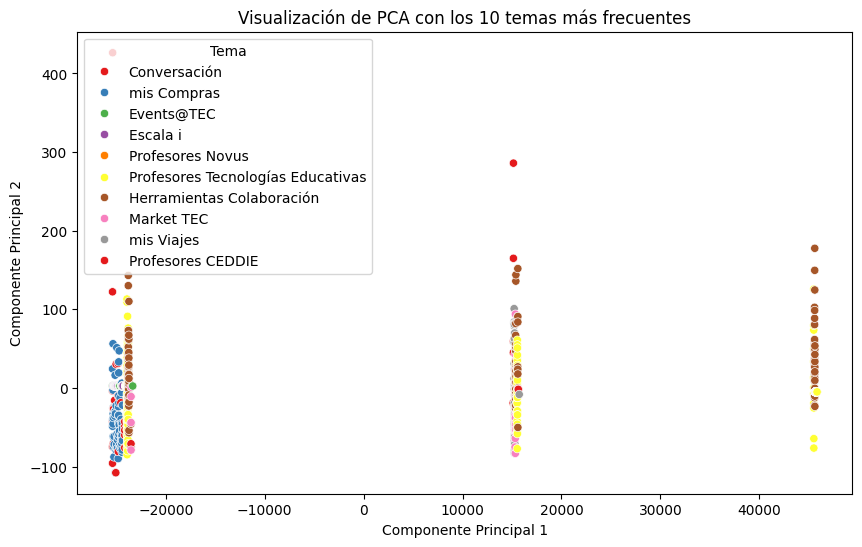

In [46]:
# Mostrar solo los 10 temas más frecuentes
top_10_temas = df['Tema'].value_counts().index[:10]
df_top_temas = df[df['Tema'].isin(top_10_temas)]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_top_temas, hue='Tema', palette='Set1', legend='full')
plt.title('Visualización de PCA con los 10 temas más frecuentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tema')
plt.show()

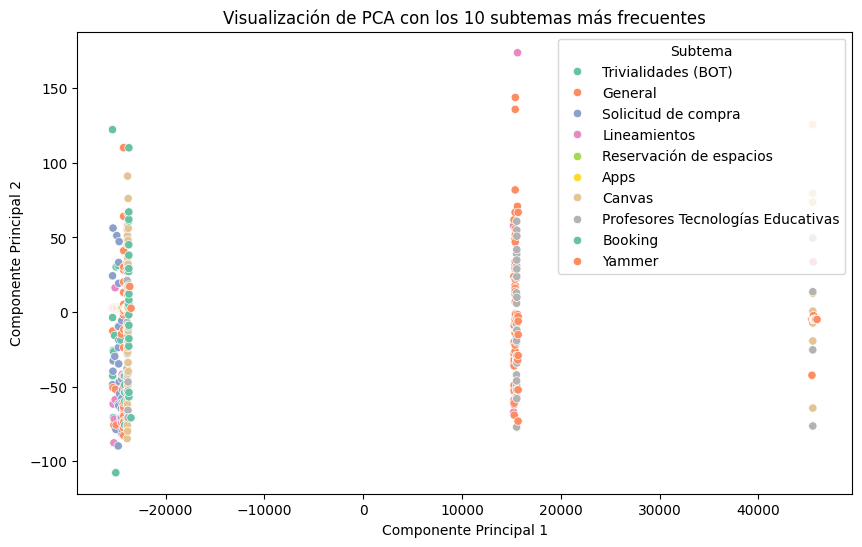

In [47]:
# Mostrar solo los 10 subtemas más frecuentes
top_10_subtemas = df['Subtema'].value_counts().index[:10]
df_top_subtemas = df[df['Subtema'].isin(top_10_subtemas)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_top_subtemas, hue='Subtema', palette='Set2', legend='full')
plt.title('Visualización de PCA con los 10 subtemas más frecuentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Subtema')
plt.show()

In [48]:
# Imprimimos las características seleccionadas por el umbral de varianza
print("Características seleccionadas tras el umbral de varianza:")
print(df_reduced.columns.tolist())

Características seleccionadas tras el umbral de varianza:
['idAnswer', 'palabras', 'Question_Length', 'Tema_Biblioteca', 'Tema_Biblioteca digital', 'Tema_Campus Virtual', 'Tema_Ciberseguridad', 'Tema_Conversación', 'Tema_Declaración anual', 'Tema_Escala i', 'Tema_Events@TEC', 'Tema_Herramientas Colaboración', 'Tema_Integridad Académica', 'Tema_Integridad y cumplimiento', 'Tema_Market TEC', 'Tema_Movilidad', 'Tema_Profesores CEDDIE', 'Tema_Profesores CIC', 'Tema_Profesores Edutools', 'Tema_Profesores Modelo Tec21', 'Tema_Profesores Novus', 'Tema_Profesores Registro i', 'Tema_Profesores TecDigital Labs', 'Tema_Profesores Tecnologías Educativas', 'Tema_Programa Flex', 'Tema_Servicios a Profesores', 'Tema_Tarjeta Corporativa', 'Tema_Telefonía móvil', 'Tema_Voluntario Seguro de Auto', 'Tema_mi Caja de ahorro', 'Tema_mis Compras', 'Tema_mis Viajes', 'Subtema_Acceso', 'Subtema_Apps', 'Subtema_Booking', 'Subtema_Canvas', 'Subtema_Compromiso con la integridad', 'Subtema_General', 'Subtema_Linea

In [50]:
# Verificación de valores faltantes
print("Valores faltantes antes de la imputación:")
print(df.isnull().sum())

# Imputación de valores faltantes:
# 1. Imputar columnas numéricas con la media
df_num = df.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas
df_num_imputed = df_num.fillna(df_num.mean())   # Imputar la media

# 2. Imputar columnas categóricas o de texto con la moda (el valor más frecuente)
df_cat = df.select_dtypes(exclude=[np.number])  # Seleccionar columnas no numéricas
df_cat_imputed = df_cat.apply(lambda col: col.fillna(col.mode()[0]))  # Imputar con la moda

# Combinar las columnas imputadas
df_imputed = pd.concat([df_num_imputed, df_cat_imputed], axis=1)

# Verificación después de la imputación
print("Valores faltantes después de la imputación:")
print(df_imputed.isnull().sum())


Valores faltantes antes de la imputación:
idQuestion                      730
Question                         60
idAnswer                          0
Answer                           30
propuesto                        44
                               ... 
Subtema_eLumen                    0
Subtema_mi Equipo de cómputo      0
Subtema_mis Cursos                0
PCA1                              0
PCA2                              0
Length: 632, dtype: int64
Valores faltantes después de la imputación:
idQuestion              0
idAnswer                0
cargado  a gpt       1447
palabras                0
DisplayText3         1447
                     ... 
Responsable             0
Revisado (ok)           0
Reemplazar en GPT       0
link                    0
Observaciones           0
Length: 632, dtype: int64


In [51]:
# Resumen estadístico después de la imputación y transformación
summary_stats = df_imputed.describe()
print(summary_stats)


       idQuestion      idAnswer  cargado  a gpt     palabras  DisplayText3  \
count      1447.0   1447.000000             0.0  1447.000000           0.0   
mean          1.0  25390.522460             NaN   111.445444           NaN   
std           0.0  29189.240274             NaN    48.567627           NaN   
min           1.0      4.000000             NaN     1.000000           NaN   
25%           1.0   1022.500000             NaN    89.000000           NaN   
50%           1.0   1648.000000             NaN   111.445444           NaN   
75%           1.0  41051.500000             NaN   114.000000           NaN   
max           1.0  71335.000000             NaN   535.000000           NaN   

       QnaId4  DisplayText4  QnaId5  DisplayText5  QnaId6  ...  Subtema_XML  \
count     0.0           0.0     0.0           0.0     0.0  ...  1447.000000   
mean      NaN           NaN     NaN           NaN     NaN  ...     0.000691   
std       NaN           NaN     NaN           NaN     NaN  .